In [148]:
"""
The Large Neighborhood Search implementation using ALNS package available online in https://pypi.org/project/alns/
"""
__author__ = "Arwa Shaker"
from alns import ALNS, State
from alns.criteria import SimulatedAnnealing
import math
import itertools
import random
import numpy.random as rnd
import pandas as pd
import networkx as nx
import numpy as np


import matplotlib.pyplot as plt

SEED = 9876


In [153]:
class TopKState(State):
    """
    Solution class for the top k worker task assignment problem, Series (vector) of tasks as index and workers as values
    the assignment quality matrix
    """

    def __init__(self, solution, AssQuality_matrix):
        self.solution = solution  # vector of tasks as indcies and workers as values
        self.tasks = solution.index
        self.workers = [self.solution[task]for task in self.solution.index]
        self.L_dash = []  # to keep the removed workers list 
        
        AssQuality_matrix = pd.DataFrame()
        for j in Y.index:
            AssQuality_matrix.loc[j, Y.loc[j]] = 0.5
        AssQuality_matrix = AssQuality_matrix.fillna(1)
        
        self.AssQuality_matrix = AssQuality_matrix  # the assignment values matrix A 
        

    def copy(self):
        """
        Helper method to ensure each solution state is immutable.
        """
        return TopKState(self.solution.copy(), self.AssQuality_matrix.copy())

    def objective(self):
        """
        The objective function is simply the sum of all Assignment qualities
        """
        value = 0.0
        for task in self.solution.index:
            if not pd.isna(self.solution[task]):
                value += self.AssQuality_matrix.loc[task, self.solution[task]]
        return value

    def find_L(self):
        worker_lose = pd.Series()
        lose = pd.Series()
        for worker in self.workers:
            worker_lose[worker] = 0.0
            for task in self.tasks:
                if (self.solution[task]) == worker:
                    worker_lose[worker] += self.AssQuality_matrix.loc[task, worker]
                         
            lose.loc[worker] = self.objective() - (self.objective()-worker_lose[worker]) # total objective value (mins) the quality of the worker at hand 
            lose = lose.sort_values(ascending=True)
        print("worker_lose\n",worker_lose)
        print("lose\n",lose)
        return list(lose.index)

# Inital solution 

In [157]:
Y = pd.Series(index=['t1','t2','t3','t4'])
Y.loc['t1'] = 'w1'
Y.loc['t2'] = 'w4'
Y.loc['t3'] = 'w3'
Y.loc['t4'] = 'w2'
AssQuality_matrix = pd.DataFrame()

for j in Y.index:
    AssQuality_matrix.loc[j,Y.loc[j]] = 0.5
AssQuality_matrix = AssQuality_matrix.fillna(1)
print("AssQuality_matrix\n",AssQuality_matrix)
solution = TopKState(Y, AssQuality_matrix)
print("solution\n",solution.solution)
print("objective value of solution",solution.objective())

AssQuality_matrix
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
solution
 t1    w1
t2    w4
t3    w3
t4    w2
dtype: object
objective value of solution 2.0


#                              Destroy method                              

In [160]:
degree_of_destruction = random.random()        # Random float x, 0.0 <= x < 1.0
print("degree_of_destruction",degree_of_destruction)

def workers_to_remove(state):
    # How many worker to be removed based on the degree of destruction
    return int(len(state.workers) * degree_of_destruction)


def worst_removal(current, random_state):
    """
    Worst removal iteratively removes the 'worst' workers, that is,
    those workers that have the lowest quality.
    """
  
    destroyed = current.copy()

    worst_workers = destroyed.find_L()  # L
    print("worst_workers",worst_workers)

    h = workers_to_remove(current) # h the number of workers to be removed
    p = 5 # the parameter p set to 5 according to ref ----

    L_dash = []
    while (h>0):   
        for task in destroyed.tasks:
            z = random.random()   # random number in [0,1)
            print("Z",z, "p", p)
            E = (z**p)* len(worst_workers)
            print("E",E)
            E = int((z**p)* len(worst_workers))
            print("int(E) ",E)
            print("worst_workers[E]", worst_workers[E])
            if destroyed.solution.loc[task] == worst_workers[E]: # try to find the worst worker 
                destroyed.solution.loc[task] = np.nan  # set the task with the worst worker to NAN 
                destroyed.workers.remove(worst_workers[E])  # remove the worst worker from the solution 
                destroyed.L_dash.append(worst_workers[E])
                h = h-1
    return destroyed


random_state = rnd.RandomState(SEED)
destroyed = worst_removal(solution, random_state)
print("destroyed\n",destroyed.solution)
print("L_dash\n",destroyed.L_dash)

degree_of_destruction 0.7108648183194255
worker_lose
 w1    0.5
w4    0.5
w3    0.5
w2    0.5
dtype: float64
lose
 w1    0.5
w4    0.5
w3    0.5
w2    0.5
dtype: float64
worst_workers ['w1', 'w4', 'w3', 'w2']
Z 0.13473768014151621 p 5
E 0.0001776255023591878
int(E)  0
worst_workers[E] w1
Z 0.6726131779429166 p 5
E 0.5506642096269583
int(E)  0
worst_workers[E] w1
Z 0.08291891940582574 p 5
E 1.567935380643117e-05
int(E)  0
worst_workers[E] w1
Z 0.6768702976839025 p 5
E 0.568312588018651
int(E)  0
worst_workers[E] w1
Z 0.5356231309598021 p 5
E 0.1763423444522134
int(E)  0
worst_workers[E] w1
Z 0.4275557792657746 p 5
E 0.057151008326378226
int(E)  0
worst_workers[E] w1
Z 0.794757134027704 p 5
E 1.2683297116500318
int(E)  1
worst_workers[E] w4
Z 0.6153010969641457 p 5
E 0.35277551788507333
int(E)  0
worst_workers[E] w1
Z 0.3699474195762842 p 5
E 0.02771787956492159
int(E)  0
worst_workers[E] w1
Z 0.38320332661235346 p 5
E 0.03305265451345763
int(E)  0
worst_workers[E] w1
Z 0.395541233515280

 # Repair method        

In [162]:

def greedy_repair(current,random_state):
    """
    Greedily repairs a solution,
    """
    # each worker has a capacity 
    capacity = pd.Series()
    for worker in current.L_dash:
        capacity[worker] = 1
    
    print("the Assignmnet Quality matrix------\n", current.AssQuality_matrix)

    current.L_dash = set(current.L_dash)# L' the list of removed workers from Y'

    U_dash = [] # U' the list of unassigned task in  Y'
    
    for task in current.solution.index:
        if  pd.isna(current.solution.loc[task]):
            U_dash.append(task)
    print("U_dash", U_dash)

    # the objective value of the destroyed solution 
    objective_value_of_destroyed = current.objective()
    print("objective_value_of_destroyed", objective_value_of_destroyed)

    # find Delta fw,
    Delta_f =  pd.DataFrame( index=[task for task in U_dash])
    
    for task in U_dash:
         for worker in current.L_dash:
             Delta_f.loc[task,worker] = (objective_value_of_destroyed + current.AssQuality_matrix.loc[task,worker]) - objective_value_of_destroyed

    print("Delta_f-----------------------------------------------------------\n", Delta_f)
    for task in U_dash:
        if (capacity[Delta_f.loc[task, :].idxmax()]) > 0:
            current.solution.loc[task] = Delta_f.loc[task,:].idxmax() # Get the BEST worker for the task at hand
            capacity[Delta_f.loc[task, :].idxmax()] -=1 # reduce the capacity by one
            if(capacity[Delta_f.loc[task, :].idxmax()]) == 0:
                Delta_f.loc[:, Delta_f.loc[task,:].idxmax()] = 0.0  # Burn the Best worker (Best worker will not be chosen next time)


    print("Delta_f-----------------------------------------------------------\n", Delta_f)
    print("repaired sol\n", current.solution)
    print(capacity)
    return current

In [163]:
repaired = greedy_repair(destroyed, random_state)
print("repaired\n",repaired.solution)

the Assignmnet Quality matrix------
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t1', 't3']
objective_value_of_destroyed 1.0
Delta_f-----------------------------------------------------------
      w3   w1
t1  1.0  0.5
t3  0.5  1.0
Delta_f-----------------------------------------------------------
      w3   w1
t1  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w3
t2    w4
t3    w1
t4    w2
dtype: object
w1    0
w3    0
dtype: int64
repaired
 t1    w3
t2    w4
t3    w1
t4    w2
dtype: object


In [164]:

"""----------------------------------------------------------------------------"""
"""                              Heuristic solution                            """
"""----------------------------------------------------------------------------"""

alns = ALNS(random_state)
alns.add_destroy_operator(worst_removal)
alns.add_repair_operator(greedy_repair)
criterion = SimulatedAnnealing(1, 0.1, 0.6) #'start_temperature', 'end_temperature', and 'step'

result = alns.iterate(initial_solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=100, collect_stats=True)

H_solution = result.best_state

objective = H_solution.objective()

print("########################the best heuristic solution########################\n",H_solution.solution, "with objective value\n", objective )

worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.9311944363074374 p 5
E 2.100502086108311
int(E)  2
worst_workers[E] w1
Z 0.4522556663880235 p 5
E 0.05675986309879377
int(E)  0
worst_workers[E] w3
Z 0.4519312440049357 p 5
E 0.05655657354585304
int(E)  0
worst_workers[E] w3
Z 0.23733079178819505 p 5
E 0.0022588723811702224
int(E)  0
worst_workers[E] w3
the Assignmnet Quality matrix------
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t1', 't3']
objective_value_of_destroyed 1.5
Delta_f-----------------------------------------------------------
      w3   w1
t1  1.0  0.5
t3  0.5  1.0
Delta_f-----------------------------------------------------------
      w3   w1
t1  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w3
t2    w1
t3    w1
t4    w2
dtype: object
w1    0
w3    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2  

 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.9596360443723175 p 5
E 2.44148474042394
int(E)  2
worst_workers[E] w1
Z 0.15846243283370476 p 5
E 0.00029974562362974986
int(E)  0
worst_workers[E] w3
Z 0.8742554611096722 p 5
E 1.5321914126389982
int(E)  1
worst_workers[E] w2
Z 0.9088416843085823 p 5
E 1.8602120105899287
int(E)  1
worst_workers[E] w2
the Assignmnet Quality matrix------
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t1', 't4']
objective_value_of_destroyed 1.5
Delta_f-----------------------------------------------------------
      w2   w1
t1  1.0  0.5
t4  0.5  1.0
Delta_f-----------------------------------------------------------
      w2   w1
t1  0.0  0.0
t4  0.0  0.0
repaired sol
 t1    w2
t2    w1
t3    w3
t4    w1
dtype: object
w1    0
w2    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: f

Z 0.9789582395823033 p 5
E 2.6973797015239165
int(E)  2
worst_workers[E] w1
Z 0.7206433909151838 p 5
E 0.5830734881660378
int(E)  0
worst_workers[E] w3
Z 0.5246753467924133 p 5
E 0.11928189937379834
int(E)  0
worst_workers[E] w3
Z 0.9311635736535699 p 5
E 2.100154023612936
int(E)  2
worst_workers[E] w1
Z 0.048234071856145144 p 5
E 7.832328332577485e-07
int(E)  0
worst_workers[E] w3
Z 0.7886496925774679 p 5
E 0.9152546553059225
int(E)  0
worst_workers[E] w3
Z 0.09135892350339969 p 5
E 1.9093085729435393e-05
int(E)  0
worst_workers[E] w3
Z 0.3404126060346133 p 5
E 0.013713535226231761
int(E)  0
worst_workers[E] w3
Z 0.36599874836388346 p 5
E 0.019702405617713616
int(E)  0
worst_workers[E] w3
Z 0.6302431849744127 p 5
E 0.29830603920930654
int(E)  0
worst_workers[E] w3
Z 0.8624173794396526 p 5
E 1.431227768928146
int(E)  1
worst_workers[E] w2
Z 0.876022820847031 p 5
E 1.5477412386790796
int(E)  1
worst_workers[E] w2
Z 0.6944273865896425 p 5
E 0.48445724491512254
int(E)  0
worst_workers[E] 

      w3   w1
t1  1.0  0.5
t3  0.5  1.0
Delta_f-----------------------------------------------------------
      w3   w1
t1  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w3
t2    w1
t3    w1
t4    w2
dtype: object
w3    0
w1    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.6228631185160592 p 5
E 0.28124469150378556
int(E)  0
worst_workers[E] w3
Z 0.2516230445205251 p 5
E 0.0030260306232849756
int(E)  0
worst_workers[E] w3
Z 0.6497844023555552 p 5
E 0.34751028742413276
int(E)  0
worst_workers[E] w3
Z 0.9078474531880383 p 5
E 1.8500593149456066
int(E)  1
worst_workers[E] w2
the Assignmnet Quality matrix------
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t3', 't4']
objective_value_of_destroyed 1.5
Delta_f-----------------------------------------------------------
      w2   w3
t3  1.0  0.5
t4  0.5  1

      w3   w1
t2  1.0  1.0
t3  0.5  1.0
Delta_f-----------------------------------------------------------
      w3   w1
t2  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w1
t2    w3
t3    w1
t4    w2
dtype: object
w3    0
w1    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.4626554467872852 p 5
E 0.06359304957509385
int(E)  0
worst_workers[E] w3
Z 0.9694607866079672 p 5
E 2.5690496074104257
int(E)  2
worst_workers[E] w1
Z 0.681591190015649 p 5
E 0.44130728432971555
int(E)  0
worst_workers[E] w3
Z 0.4821319777371047 p 5
E 0.07815395155057328
int(E)  0
worst_workers[E] w3
the Assignmnet Quality matrix------
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t2', 't3']
objective_value_of_destroyed 1.0
Delta_f-----------------------------------------------------------
      w3   w1
t2  1.0  1.0
t3  0.5  1.0


      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t2', 't3', 't4']
objective_value_of_destroyed 0.5
Delta_f-----------------------------------------------------------
      w2   w3   w1
t2  1.0  1.0  1.0
t3  1.0  0.5  1.0
t4  0.5  1.0  1.0
Delta_f-----------------------------------------------------------
      w2   w3   w1
t2  0.0  0.0  0.0
t3  0.0  0.0  0.0
t4  0.0  0.0  0.0
repaired sol
 t1    w1
t2    w2
t3    w1
t4    w3
dtype: object
w1    0
w3    0
w2    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.6206848655927643 p 5
E 0.27636117749074546
int(E)  0
worst_workers[E] w3
Z 0.9451488541636919 p 5
E 2.2626757143351766
int(E)  2
worst_workers[E] w1
Z 0.03761774197430945 p 5
E 2.2598773577565588e-07
int(E)  0
worst_workers[E] w3
Z 0.6775998785479141 p 5
E 0.4285365334095635
int(E)  0
worst_worker

      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0  1.0  0.5  1.0
t4  1.0  1.0  1.0  0.5
U_dash ['t1', 't3']
objective_value_of_destroyed 1.5
Delta_f-----------------------------------------------------------
      w3   w1
t1  1.0  0.5
t3  0.5  1.0
Delta_f-----------------------------------------------------------
      w3   w1
t1  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w3
t2    w1
t3    w1
t4    w2
dtype: object
w3    0
w1    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.30584639062749686 p 5
E 0.008028567313052334
int(E)  0
worst_workers[E] w3
Z 0.12852586827024737 p 5
E 0.00010521411029391013
int(E)  0
worst_workers[E] w3
Z 0.9279249223645762 p 5
E 2.063884791939274
int(E)  2
worst_workers[E] w1
Z 0.703310260542639 p 5
E 0.5162451938409465
int(E)  0
worst_workers[E] w3
Z 0.7989981051801542 p 5
E 0.9768997571936207
int(E)  0
worst_workers[E]

worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.04810632494778477 p 5
E 7.729157502434241e-07
int(E)  0
worst_workers[E] w3
Z 0.0910244857180037 p 5
E 1.8746164518118482e-05
int(E)  0
worst_workers[E] w3
Z 0.7410781670975729 p 5
E 0.6705657202559299
int(E)  0
worst_workers[E] w3
Z 0.34911493910815405 p 5
E 0.015558345842019828
int(E)  0
worst_workers[E] w3
Z 0.3185863647507826 p 5
E 0.009845939813970066
int(E)  0
worst_workers[E] w3
Z 0.5120975772673791 p 5
E 0.10565373649304818
int(E)  0
worst_workers[E] w3
Z 0.09250294804779391 p 5
E 2.0318849981479868e-05
int(E)  0
worst_workers[E] w3
Z 0.6224254576354608 p 5
E 0.2802579824124389
int(E)  0
worst_workers[E] w3
Z 0.229288075833471 p 5
E 0.0019012034928627829
int(E)  0
worst_workers[E] w3
Z 0.5978180842918053 p 5
E 0.2290690935812646
int(E)  0
worst_workers[E] w3
Z 0.806220793456294 p 5
E 1.0218596005320086
int(E)  1
worst_workers[E] w2
Z 

      w2   w3   w1
t1  1.0  1.0  0.5
t2  1.0  1.0  1.0
t3  1.0  0.5  1.0
t4  0.5  1.0  1.0
Delta_f-----------------------------------------------------------
      w2   w3   w1
t1  0.0  0.0  0.0
t2  0.0  0.0  0.0
t3  0.0  0.0  0.0
t4  0.0  0.0  0.0
repaired sol
 t1     w2
t2     w3
t3     w1
t4    NaN
dtype: object
w3    0
w1    0
w2    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.06030970906791977 p 5
E 2.393632219170355e-06
int(E)  0
worst_workers[E] w3
Z 0.22370295860009937 p 5
E 0.0016806601178460281
int(E)  0
worst_workers[E] w3
Z 0.5566371827359962 p 5
E 0.16031801297712248
int(E)  0
worst_workers[E] w3
Z 0.2341005258747556 p 5
E 0.002109274979969973
int(E)  0
worst_workers[E] w3
Z 0.66257511701364 p 5
E 0.38308651475532185
int(E)  0
worst_workers[E] w3
Z 0.4840746421946186 p 5
E 0.07974122816241844
int(E)  0
worst_workers[E] w3
Z 0.3123096972314797 p 5
E 0.00891350

      w3   w1
t2  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w1
t2    w3
t3    w1
t4    w2
dtype: object
w1    0
w3    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.5680075979936625 p 5
E 0.1773748251375678
int(E)  0
worst_workers[E] w3
Z 0.8396508559704077 p 5
E 1.2520305616526657
int(E)  1
worst_workers[E] w2
Z 0.7801956618470332 p 5
E 0.8672392206966615
int(E)  0
worst_workers[E] w3
Z 0.6181330568216812 p 5
E 0.2707267083193346
int(E)  0
worst_workers[E] w3
Z 0.9295967878531451 p 5
E 2.0825446745174503
int(E)  2
worst_workers[E] w1
Z 0.43112553541119447 p 5
E 0.04468275971350554
int(E)  0
worst_workers[E] w3
Z 0.49575474883880843 p 5
E 0.08983708874417813
int(E)  0
worst_workers[E] w3
Z 0.7272545728734434 p 5
E 0.6103143174728566
int(E)  0
worst_workers[E] w3
the Assignmnet Quality matrix------
      w1   w4   w3   w2
t1  0.5  1.0  1.0  1.0
t2  1.0  0.5  1.0  1.0
t3  1.0

      w3   w1
t1  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w3
t2    w1
t3    w1
t4    w2
dtype: object
w1    0
w3    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.11928815889175093 p 5
E 7.246160230388646e-05
int(E)  0
worst_workers[E] w3
Z 0.9077115702670346 p 5
E 1.8486751825144483
int(E)  1
worst_workers[E] w2
Z 0.6684991940817392 p 5
E 0.400521371701578
int(E)  0
worst_workers[E] w3
Z 0.7417731042970434 p 5
E 0.6737156973988925
int(E)  0
worst_workers[E] w3
Z 0.02768863112290698 p 5
E 4.8823474476124286e-08
int(E)  0
worst_workers[E] w3
Z 0.7474356795494318 p 5
E 0.6998264973727621
int(E)  0
worst_workers[E] w3
Z 0.42155178055730014 p 5
E 0.03993704198226507
int(E)  0
worst_workers[E] w3
Z 0.06704306804502491 p 5
E 4.06341010872572e-06
int(E)  0
worst_workers[E] w3
Z 0.21352508373774015 p 5
E 0.0013315753869638208
int(E)  0
worst_workers[E] w3
Z 0.5602097812849468 p 5

Z 0.16525783211655842 p 5
E 0.00036976986201787455
int(E)  0
worst_workers[E] w3
Z 0.40357712923927147 p 5
E 0.032118406358567664
int(E)  0
worst_workers[E] w3
Z 0.802240766455257 p 5
E 0.9968846085092862
int(E)  0
worst_workers[E] w3
Z 0.49215544407116907 p 5
E 0.08662290061344424
int(E)  0
worst_workers[E] w3
Z 0.3918197965560717 p 5
E 0.02770467938792675
int(E)  0
worst_workers[E] w3
Z 0.9081541381022478 p 5
E 1.8531863202198169
int(E)  1
worst_workers[E] w2
Z 0.8735729939644633 p 5
E 1.5262203946506943
int(E)  1
worst_workers[E] w2
Z 0.30008800609275343 p 5
E 0.007300699015618781
int(E)  0
worst_workers[E] w3
Z 0.46642527057939454 p 5
E 0.06622647129994477
int(E)  0
worst_workers[E] w3
Z 0.5979776770391385 p 5
E 0.2293750168292786
int(E)  0
worst_workers[E] w3
Z 0.1090810685521807 p 5
E 4.633062648528204e-05
int(E)  0
worst_workers[E] w3
Z 0.574366497717908 p 5
E 0.18752827319282606
int(E)  0
worst_workers[E] w3
Z 0.354453931337263 p 5
E 0.01678495737239155
int(E)  0
worst_workers[

objective_value_of_destroyed 1.5
Delta_f-----------------------------------------------------------
      w3   w1
t1  1.0  0.5
t3  0.5  1.0
Delta_f-----------------------------------------------------------
      w3   w1
t1  0.0  0.0
t3  0.0  0.0
repaired sol
 t1    w3
t2    w1
t3    w1
t4    w2
dtype: object
w1    0
w3    0
dtype: int64
worker_lose
 w1    1.5
w3    0.5
w2    0.5
dtype: float64
lose
 w3    0.5
w2    0.5
w1    1.5
dtype: float64
worst_workers ['w3', 'w2', 'w1']
Z 0.8170332020563619 p 5
E 1.0922442875897063
int(E)  1
worst_workers[E] w2
Z 0.4750295947222474 p 5
E 0.07256456422513495
int(E)  0
worst_workers[E] w3
Z 0.4389829392185315 p 5
E 0.04890569834184684
int(E)  0
worst_workers[E] w3
Z 0.12497289146519064 p 5
E 9.145350300513991e-05
int(E)  0
worst_workers[E] w3
Z 0.1942957247399978 p 5
E 0.000830687121424746
int(E)  0
worst_workers[E] w3
Z 0.23705099236956018 p 5
E 0.0022455883341867162
int(E)  0
worst_workers[E] w3
Z 0.39500399935492037 p 5
E 0.028848864162680246
i

# old code

In [152]:
"""
The Large Neighborhood Search implementation using ALNS package available online in https://pypi.org/project/alns/
"""
__author__ = "Arwa Shaker"
from alns import ALNS, State
from alns.criteria import SimulatedAnnealing
import math
import itertools
import random
import numpy.random as rnd
import pandas as pd
import networkx as nx
import numpy as np


import matplotlib.pyplot as plt

SEED = 9876


class TopKState(State):
    """
    Solution class for the top k worker task assignment problem, Series (vector) of tasks as index and workers as values
    the assignment quality matrix
    """

    def __init__(self, solution, AssQuality_matrix):
        self.solution = solution
        self.tasks = solution.index
        self.workers = [self.solution[task]for task in self.solution.index]
        self.AssQuality_matrix = AssQuality_matrix
        print(self.workers)

    def copy(self):
        """
        Helper method to ensure each solution state is immutable.
        """
        return TopKState(self.solution.copy(), self.AssQuality_matrix.copy())

    def objective(self):
        """
        The objective function is simply the sum of all Assignment qualities
        """
        value = 0.0
        for task in self.solution.index:
            if not pd.isna(self.solution[task]):
                value += self.AssQuality_matrix.loc[task, self.solution[task]]
        return value

    def find_L(self):
        benefit = pd.Series()
        for task in self.solution.index:
                benefit.loc[self.solution[task]] = self.objective() - self.AssQuality_matrix.loc[:, self.solution[task]].sum()
        benefit.sort_values(ascending=False)
        return list(benefit.index)


"""----------------------------------------------------------------------------"""
"""                              Destroy method                                """
"""----------------------------------------------------------------------------"""

degree_of_destruction = random.random()        # Random float x, 0.0 <= x < 1.0
print("degree_of_destruction",degree_of_destruction)

def workers_to_remove(state):
    # How many worker to be removed based on the degree of destruction
    return int(len(state.workers) * degree_of_destruction)


def worst_removal(current, random_state):
    """
    Worst removal iteratively removes the 'worst' workers, that is,
    those workers that have the lowest quality.
    """
    AssQuality_matrix = pd.DataFrame()
    for j in Y.index:
        AssQuality_matrix.loc[j, Y.loc[j]] = 0.5
    AssQuality_matrix = AssQuality_matrix.fillna(1)
    destroyed = current.copy()

    worst_workers = destroyed.find_L()  # L
    print("worst_workers",worst_workers)

    h = workers_to_remove(current) # h the number of workers to be removed
    p = 5 # the parameter p set to 5 according to ref ----

    L_dash = []
    while (h>0):
        for task in destroyed.tasks:
            z = random.random()   # random number in [0,1)
            E = int((z**p)* len(worst_workers))
            print("worst_workers[-idx - 1]", worst_workers[E])
            if destroyed.solution.loc[task] == worst_workers[E]:
                destroyed.solution.loc[task] = np.nan
                destroyed.workers.remove(worst_workers[E])
                L_dash.append(worst_workers[E])
                h = h-1
    return destroyed


"""----------------------------------------------------------------------------"""
"""                              Repair method                                 """
"""----------------------------------------------------------------------------"""


def greedy_repair(current,random_state):
    """
    Greedily repairs a solution,
    """
    print("line 124-----------------------------------", type(current))
    L_dash = {'w1', 'w3'}
    capacity = pd.Series()
    for worker in L_dash:
        capacity[worker] = 2

    AssQuality_matrix = pd.DataFrame()

    for j in Y.index:
        AssQuality_matrix.loc[j, Y.loc[j]] = 0.5
    AssQuality_matrix = AssQuality_matrix.fillna(1)

    L_dash = set(L_dash)# L' the list of removed workers from Y'
    print("L_dash", L_dash)
    U_dash = [] # U' the list of unassigned task in  Y'
    print("line 124---------",type(current))
    for task in current.solution.index:
        print("current.solution.loc[task]",current.solution.loc[task])
        if  pd.isna(current.solution.loc[task]):
            U_dash.append(task)
    print("U_dash", U_dash)

    # find Delta fw,

    Delta_f =  pd.DataFrame( index=[task for task in U_dash])
    objective_value_of_destroyed = current.objective()
    print("objective_value_of_destroyed", objective_value_of_destroyed)

    for task in U_dash:
         for worker in L_dash:
             Delta_f.loc[task,worker] = (objective_value_of_destroyed + AssQuality_matrix.loc[task,worker]) - objective_value_of_destroyed

    print("Delta_f-----------------------------------------------------------\n", Delta_f)
    for task in U_dash:

        if (capacity[Delta_f.loc[task, :].idxmax()]) > 0:
            current.solution.loc[task] = Delta_f.loc[task,:].idxmax() # Get the BEST worker
            capacity[Delta_f.loc[task, :].idxmax()] -=1 # reduce the capacity by one
            if(capacity[Delta_f.loc[task, :].idxmax()]) == 0:
                Delta_f.loc[:, Delta_f.loc[task,:].idxmax()] = 0.0  # Burn the Best worker (Best worker will not be chosen next time)


    print("Delta_f-----------------------------------------------------------\n", Delta_f)
    print("repaired sol\n", current.solution)
    print(capacity)
    return current

random_state = rnd.RandomState(SEED)
Y = pd.Series(index=['t1','t2','t3','t4'])
Y.loc['t1'] = 'w1'
Y.loc['t2'] = 'w1'
Y.loc['t3'] = 'w3'
Y.loc['t4'] = 'w2'
AssQuality_matrix = pd.DataFrame()

for j in Y.index:
    AssQuality_matrix.loc[j,Y.loc[j]] = 0.5
AssQuality_matrix = AssQuality_matrix.fillna(1)
print("AssQuality_matrix",AssQuality_matrix)
solution = TopKState(Y, AssQuality_matrix)


print(solution.objective())
print("the solution\n",solution.solution)

destroyed = worst_removal(solution, random_state)
print("destroyed\n",destroyed.solution)
capacity = pd.Series()


print("---------------destroyed---------------------------------",type(destroyed))

random_state = rnd.RandomState(SEED) #generating random numbers drawn from a variety of probability distributions
state = TopKState(Y, AssQuality_matrix)
print(state)
initial_solution = greedy_repair(state, random_state)
print("---------------initail---------------------------------",type(initial_solution))
print("Initial solution objective is {0}.".format(initial_solution.objective()))

alns = ALNS(random_state)
alns.add_destroy_operator(worst_removal)
alns.add_repair_operator(greedy_repair)
criterion = SimulatedAnnealing(1, 0.1, 0.6) #'start_temperature', 'end_temperature', and 'step'

result = alns.iterate(initial_solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=5000, collect_stats=True)

solution = result.best_state

objective = solution.objective()



degree_of_destruction 0.20952772271186126
AssQuality_matrix      w1   w3   w2
t1  0.5  1.0  1.0
t2  0.5  1.0  1.0
t3  1.0  0.5  1.0
t4  1.0  1.0  0.5
['w1', 'w1', 'w3', 'w2']
2.0
the solution
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
destroyed
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
---------------destroyed--------------------------------- <class '__main__.TopKState'>
['w1', 'w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired so

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
object

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
cur

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: [

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: [

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
curr

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124------------------------------

Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKSt

Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_dash {'w3', 'w1'}
line 124--------- <class '__main__.TopKState'>
current.solution.loc[task] w1
current.solution.loc[task] w1
current.solution.loc[task] w3
current.solution.loc[task] w2
U_dash []
objective_value_of_destroyed 2.0
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
Delta_f-----------------------------------------------------------
 Empty DataFrame
Columns: []
Index: []
repaired sol
 t1    w1
t2    w1
t3    w3
t4    w2
dtype: object
w3    2
w1    2
dtype: int64
['w1', 'w1', 'w3', 'w2']
worst_workers ['w1', 'w3', 'w2']
line 124----------------------------------- <class '__main__.TopKState'>
L_da

KeyboardInterrupt: 

6
Best individual
************************
  [ 0.69779977 -0.16660821  0.45078594  0.55005373]
Generation	 0 
*****************************************
 [[0.62944603 0.1055335  0.05451775 0.86858679]
 [0.85284924 0.24245637 0.11719362 0.56895715]
 [0.8106255  0.44519446 0.0536561  0.53787238]
 [0.17709918 0.29659329 0.16577547 0.76733416]
 [0.75531564 0.30966313 0.53983381 0.40185947]
 [0.57882861 0.2643346  0.7330196  0.64963312]
 [0.84889988 0.4166959  0.72539297 0.77502686]
 [0.84352092 0.45684339 0.13317858 0.93863239]
 [0.37332597 0.39215329 0.89007434 0.28630658]
 [0.332043   0.1006249  0.68398775 0.05627302]]
Generation	 1 
*****************************************
 [[0.         0.         1.         1.        ]
 [1.         0.24245637 0.11719362 0.56895715]
 [1.         1.         0.03373522 1.        ]
 [1.         0.29659329 0.         1.        ]
 [0.         1.         1.         1.        ]
 [1.         1.         0.73841886 1.        ]
 [0.84889988 0.4166959  1.         0

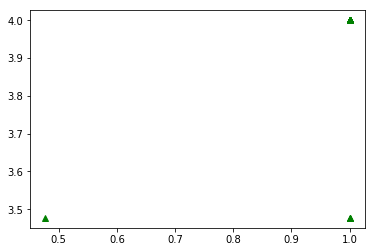

In [156]:
"""
differential_evolution: The differential evolution global optimization algorithm
"""
#!/usr/bin/python
__author__ = "Arwa Shaker"


import numpy as np
import random
import matplotlib.pyplot as plt

def DE(objective_f, bounds, popsize=10, its=10):
    dimensions = len(bounds)
    """----------------------------------------------------------------------------"""
    """                Step #1 generate the Initial Population randomly            """
    """----------------------------------------------------------------------------"""
    pop = np.random.rand(popsize, dimensions)

    """----------------------------------------------------------------------------"""
    """                Step #2 Evaluate the individuals fitness                    """
    """----------------------------------------------------------------------------"""
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([objective_f(ind) for ind in pop_denorm])
    best_idx = np.argmax(fitness)
    print(best_idx)
    best = pop_denorm[best_idx]
    print("Best individual\n************************\n ",best)
    """----------------------------------------------------------------------------"""
    """                Step #3 Differential Evolution Cycle                        """
    """----------------------------------------------------------------------------"""
    for i in range(its):
        print("Generation\t",i,"\n*****************************************\n",pop)
        for j in range(popsize):
            # set the target vector
            target = pop[j]
            """----------------------------------------------------------------------------"""
            """                     Setting Mutation Parameters                            """
            """----------------------------------------------------------------------------"""
            CRs = [0.1, 0.9, 0.2]
            Fmin = 0.6
            Fmax = 1.5
            MAXfit = 5000
            cfe = objective_f.calls # number of calls to the fitness function

            F = ((Fmin-Fmax/MAXfit)*cfe) + Fmax
            """----------------------------------------------------------------------------"""
            """                     The Strategy #1 "rand/1/bin                            """
            """----------------------------------------------------------------------------"""
            # choose 3 vectors other than j
            idxs = [idx for idx in range(popsize) if idx != j]
            r1, r2, r3 = pop[np.random.choice(idxs, 3, replace=False)]
            # mutation  clip is to keep the values to be between 0, and 1
            mutant_rand_1 = np.clip(r1 + F * (r2 - r3), 0, 1)
            # binomial  crossover
            CR = random.choice(CRs)
            cross_points = np.random.rand(dimensions) < CR
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial_1 = np.where(cross_points, mutant_rand_1, target)
            trial_1_denorm = min_b + trial_1 * diff
            f_1 = objective_f(trial_1_denorm)
            """----------------------------------------------------------------------------"""
            """                     The Strategy #2 "rand/2/bin                            """
            """----------------------------------------------------------------------------"""

            # choose 5 vectors other than j
            idxs = [idx for idx in range(popsize) if idx != j]
            r1, r2, r3, r4,r5 = pop[np.random.choice(idxs, 5, replace=False)]
            Frand = np.random.random_sample()
            mutant_rand_2 = np.clip(r1 + Frand * (r2 - r3) + F*(r4 - r5), 0, 1)

            # binomial  crossover
            CR = random.choice(CRs)
            cross_points = np.random.rand(dimensions) < CR
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial_2 = np.where(cross_points, mutant_rand_2, target)  #pop[j] is the Target
            trial_2_denorm = min_b + trial_2 * diff
            f_2 = objective_f(trial_2_denorm)

            """----------------------------------------------------------------------------"""
            """                 The Strategy #3 "current-to-rand/1                         """
            """----------------------------------------------------------------------------"""
            # choose 3 vectors other than j
            idxs = [idx for idx in range(popsize) if idx != j]
            r1, r2, r3 = pop[np.random.choice(idxs, 3, replace=False)]
            rand = np.random.random_sample()
            trial_3 = np.clip(target + rand * (r1 - target) + F * (r2 - r3), 0, 1)
            # No crossover
            trial_3_denorm = min_b + trial_3 * diff
            f_3 = objective_f(trial_3_denorm)

            """----------------------------------------------------------------------------"""
            """                 FIND THE BEST AMONG THE 3 TRAIL VECTORS                    """
            """----------------------------------------------------------------------------"""

            maximum = max(f_1,f_2,f_3)

            if f_1 == maximum and f_1 > fitness[j]:
                fitness[j] = f_1
                pop[j] = trial_1
                if f_1 > fitness[best_idx]:
                    best_idx = j
                    best = trial_1_denorm

            if f_2 == maximum and f_2 > fitness[j]:
                fitness[j] = f_2
                pop[j] = trial_2
                if f_2 > fitness[best_idx]:
                    best_idx = j
                    best = trial_2_denorm

            if f_3 == maximum and f_3 > fitness[j]:
                fitness[j] = f_3
                pop[j] = trial_3
                if f_3 > fitness[best_idx]:
                    best_idx = j
                    best = trial_3_denorm

        yield best, fitness[best_idx]



def call_counter(func):
    def helper(*args, **kwargs):
        helper.calls += 1
        return func(*args, **kwargs)
    helper.calls = 0
    helper.__name__= func.__name__
    return helper


"""----------------------------------------------------------------------------"""
"""                                The Fitness Function                        """
"""----------------------------------------------------------------------------"""
@call_counter
def objective_f(x):
    #A = np.array([0.9, 0.1, 0.9, 0.1]) # Assignment Quality
    value = 0.0
    for i in range(len(x)):
        value += x[i]
    return value


"""----------------------------------------------------------------------------"""
"""                         Calling the DE and Plotting                        """
"""----------------------------------------------------------------------------"""
bounds=[(-1, 1)] * 4
it = list(DE(objective_f,bounds))
x, f = zip(*it)

print("x",x[-1])
print("f",f[-1])
plt.plot(x, f, 'g^')

plt.show()


